In [2]:
import numpy as np
import pandas as pd

In [3]:
#df_dc = pd.read_csv("./data/gear_debit_credit.csv", header=0, delimiter=",")
#df_dc.head()

In [4]:
try:
    df_vs = pd.read_csv("./data/gear_value_stram.csv", header=0, delimiter=",")
    df_vs.head().head()
except:
    print("Error loading data")

In [5]:
df_vs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085354 entries, 0 to 1085353
Data columns (total 99 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Serial                     1085354 non-null  object 
 1   laser_mark108              1085354 non-null  int64  
 2   laser_mark208              1085354 non-null  int64  
 3   SD000089X01                1085354 non-null  int64  
 4   SD000091X01                1085354 non-null  int64  
 5   SD000092X03                1085354 non-null  int64  
 6   SD000191X02                1085354 non-null  int64  
 7   SD000093X02                1085354 non-null  int64  
 8   SD000105X02                1085354 non-null  int64  
 9   begin_ts_gear              1085354 non-null  object 
 10  end_ts_gear                1085354 non-null  object 
 11  lead_time_gear             1085354 non-null  int64  
 12  last_status_gear           1085354 non-null  int64  
 13  Gear        

In [6]:
vs_columns = df_vs.columns
vs_columns_ts = vs_columns[vs_columns.str.contains("_ts_") | vs_columns.str.contains("_Binding")]
print(vs_columns_ts)

vs_columns_lead = vs_columns[vs_columns.str.contains("lead")]
print(vs_columns_lead)

vs_columns_status = vs_columns[vs_columns.str.contains("status")]
print(vs_columns_status)

Index(['begin_ts_gear', 'end_ts_gear', 'First_AssistMech_Binding',
       'Last_AssistMech_Binding', 'am_ts_begin', 'am_ts_end', 'final_ts_begin',
       'final_ts_end'],
      dtype='object')
Index(['lead_time_gear', 'lead_time_am', 'lead_gear_am_ts', 'lead_time_final'], dtype='object')
Index(['last_status_gear', 'am_last_status', 'final_last_status'], dtype='object')


In [7]:
vs_columns_serials = ['First_AssistMech','Last_AssistMech','Gear', 'Serial']
vs_columns_stats = ['num_of_am_binded', 'number_of_cycles_in_am','number_of_cycles_in_final']

vs_columns_stations = vs_columns.difference(vs_columns_lead)\
                                .difference(vs_columns_ts)\
                                .difference(vs_columns_serials)\
                                .difference(vs_columns_status)\
                                .difference(vs_columns_stats)

print(vs_columns_stations)

Index(['GA311510X01', 'GA770716X01', 'SD000071X01', 'SD000071X02',
       'SD000072X01', 'SD000073X01', 'SD000074X01', 'SD000077X01',
       'SD000077X02', 'SD000078X01', 'SD000078X03', 'SD000078X04',
       'SD000079X01', 'SD000079X02', 'SD000083X01', 'SD000083X50',
       'SD000084X01', 'SD000089X01', 'SD000091X01', 'SD000092X03',
       'SD000093X01', 'SD000093X02', 'SD000094X01', 'SD000096X01',
       'SD000097X01', 'SD000098X01', 'SD000099X01', 'SD000100X01',
       'SD000102X01', 'SD000104X01', 'SD000105X01', 'SD000105X02',
       'SD000106X01', 'SD000107X01', 'SD000109X01', 'SD000109X02',
       'SD000119X01', 'SD000119X02', 'SD000120X01', 'SD000120X02',
       'SD000130X06', 'SD000191X01', 'SD000191X02', 'SD000192X02',
       'SD000193X02', 'SD000195X01', 'SD000196X01', 'SD000198X01',
       'SD000199X01', 'SD000201X01', 'SD000202X01', 'SD000203X01',
       'SD000204X01', 'SD000204X05', 'SD000206X01', 'SD000207X01',
       'SD000209X01', 'SD000209X02', 'SD000210X01', 'SD000210X

In [8]:
df_vs_filled = df_vs.copy()
df_vs_filled[vs_columns_stations] = df_vs[vs_columns_stations].fillna(0)

for c in vs_columns_stations:
    df_vs_filled[c] = df_vs_filled[c].astype(int)


In [9]:
df_vs_filled[vs_columns_serials] = df_vs[vs_columns_serials].fillna('not_available')

for c in vs_columns_serials:
    df_vs_filled[c] = df_vs_filled[c].astype(str)

In [10]:


#vs_columns_ts
#vs_columns_status
#vs_columns_stats

df_vs_filled[vs_columns_lead] = df_vs[vs_columns_lead].fillna(-1)

for c in vs_columns_lead:
    df_vs_filled[c] = df_vs_filled[c].astype(int)



In [11]:
def has_ms(ts):
    if "." in ts:
        return ts
    else:
        return ts + ".000000"

In [12]:
#
#vs_columns_status
#vs_columns_stats
df_vs_filled[vs_columns_ts] = df_vs[vs_columns_ts].fillna('1970-01-01 00:00:00')

for c in vs_columns_ts:
    print(c)
    df_vs_filled[c] = df_vs_filled[c].apply(has_ms)
    df_vs_filled[c] = pd.to_datetime(df_vs_filled[c], format='%Y-%m-%d %H:%M:%S.%f')

print(df_vs_filled[vs_columns_ts].info())


begin_ts_gear
end_ts_gear
First_AssistMech_Binding
Last_AssistMech_Binding
am_ts_begin
am_ts_end
final_ts_begin
final_ts_end
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085354 entries, 0 to 1085353
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   begin_ts_gear             1085354 non-null  datetime64[ns]
 1   end_ts_gear               1085354 non-null  datetime64[ns]
 2   First_AssistMech_Binding  1085354 non-null  datetime64[ns]
 3   Last_AssistMech_Binding   1085354 non-null  datetime64[ns]
 4   am_ts_begin               1085354 non-null  datetime64[ns]
 5   am_ts_end                 1085354 non-null  datetime64[ns]
 6   final_ts_begin            1085354 non-null  datetime64[ns]
 7   final_ts_end              1085354 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 66.2 MB
None


In [13]:
df_vs_filled[vs_columns_status] = df_vs[vs_columns_status].fillna('not_available')

for c in vs_columns_status:
    df_vs_filled[c] = df_vs_filled[c].astype(str)
    

In [14]:
df_vs_filled[vs_columns_stats] = df_vs[vs_columns_stats].fillna(0)

for c in vs_columns_stats:
    df_vs_filled[c] = df_vs_filled[c].astype(int)

In [15]:
df_vs_filled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085354 entries, 0 to 1085353
Data columns (total 99 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Serial                     1085354 non-null  object        
 1   laser_mark108              1085354 non-null  int64         
 2   laser_mark208              1085354 non-null  int64         
 3   SD000089X01                1085354 non-null  int64         
 4   SD000091X01                1085354 non-null  int64         
 5   SD000092X03                1085354 non-null  int64         
 6   SD000191X02                1085354 non-null  int64         
 7   SD000093X02                1085354 non-null  int64         
 8   SD000105X02                1085354 non-null  int64         
 9   begin_ts_gear              1085354 non-null  datetime64[ns]
 10  end_ts_gear                1085354 non-null  datetime64[ns]
 11  lead_time_gear             1085354 no

In [16]:
#df_vs_filled.to_csv("./data/gear_value_stream_filled.csv", index=False)

df_vs_filled.head()

,Serial,laser_mark108,laser_mark208,SD000089X01,SD000091X01,SD000092X03,SD000191X02,SD000093X02,SD000105X02,begin_ts_gear,...,SD000078X03,SD000079X01,SD000084X01,SD000203X01,SD000211X04,number_of_cycles_in_final,final_ts_begin,final_ts_end,final_last_status,lead_time_final
0,26111047240610011800,0,1,2,2,2,0,1,1,2024-03-01 01:11:36.130,...,1,2,2,0,0,5,2024-03-01 18:07:47.810,2024-03-01 18:09:02.370,9999.0,2
1,26111047240610011900,0,1,2,2,2,0,1,1,2024-03-01 01:11:36.120,...,1,2,2,0,0,5,2024-03-01 18:51:07.670,2024-03-01 18:54:04.503,9999.0,3
2,26111047240610012100,0,1,2,2,2,0,1,1,2024-03-01 01:11:36.130,...,1,2,2,0,0,5,2024-03-01 21:13:51.243,2024-03-01 21:15:09.343,9999.0,2
3,26111047240940037200,0,1,2,2,0,2,0,0,2024-04-03 18:50:45.383,...,1,0,2,0,0,3,2024-04-04 20:29:05.653,2024-04-04 20:29:40.650,9999.0,0
4,26111047240940037600,0,1,2,2,0,2,0,0,2024-04-03 18:51:31.753,...,1,0,2,0,0,3,2024-04-03 23:08:47.227,2024-04-03 23:09:11.120,9999.0,1


In [17]:
df_vs_filled['day'] = df_vs_filled['begin_ts_gear'].apply(lambda x: x.date())

df_vs_filled[['day','begin_ts_gear']].head()


,day,begin_ts_gear
0,2024-03-01,2024-03-01 01:11:36.130
1,2024-03-01,2024-03-01 01:11:36.120
2,2024-03-01,2024-03-01 01:11:36.130
3,2024-04-03,2024-04-03 18:50:45.383
4,2024-04-03,2024-04-03 18:51:31.753


In [18]:
df_vs_stations = df_vs_filled[vs_columns_stations].copy()

df_vs_stations.head()

,GA311510X01,GA770716X01,SD000071X01,SD000071X02,SD000072X01,SD000073X01,SD000074X01,SD000077X01,SD000077X02,SD000078X01,...,SD000228X01,SD000229X01,SD000230X01,SD000231X01,SD000232X01,SD000232X07,SD000236X01,SD000237X01,laser_mark108,laser_mark208
0,2,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
2,2,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
3,2,6,0,1,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,1
4,2,2,0,1,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_vs_stations.shape


(1085354, 77)

In [20]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler

df_vs_stations_sample = df_vs_stations.sample(10000, random_state=42)

scaler = StandardScaler()
df_vs_stations_sample = pd.DataFrame(scaler.fit_transform(df_vs_stations_sample)
                                     , columns=df_vs_stations_sample.columns)

In [21]:
# Importando bibliotecas necessárias

#from scipy.cluster.hierarchy import dendrogram, linkage
#import matplotlib.pyplot as plt

# Criando o linkage matrix
#linkage_matrix = linkage(df_vs_stations_sample, method='ward')

# Plotando o dendrograma
#plt.figure(figsize=(15, 10))
#dendrogram(linkage_matrix)
#plt.title('Dendrograma da Análise Hierárquica das Estações')
#plt.xlabel('Índice da Amostra')
#plt.ylabel('Distância')
#plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

# Criando o modelo de clustering hierárquico
n_clusters = 4  # Você pode ajustar este número conforme necessário
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)

# Ajustando o modelo aos dados
clusters = hierarchical.fit_predict(df_vs_stations_sample)

# Adicionando os clusters ao dataframe original
df_vs_stations_sample['Cluster'] = clusters

# Exibindo a distribuição dos clusters
print("\nDistribuição dos clusters:")
print(df_vs_stations_sample['Cluster'].value_counts())


Distribuição dos clusters:
Cluster
0    5257
1    3150
2     938
3     655
Name: count, dtype: int64


In [23]:
idx_cluster_0 = df_vs_stations_sample[df_vs_stations_sample['Cluster'] == 0].index
idx_cluster_1 = df_vs_stations_sample[df_vs_stations_sample['Cluster'] == 1].index
idx_cluster_2 = df_vs_stations_sample[df_vs_stations_sample['Cluster'] == 2].index
idx_cluster_3 = df_vs_stations_sample[df_vs_stations_sample['Cluster'] == 3].index

sum_0 = df_vs_stations.iloc[idx_cluster_0].sum()
sum_1 = df_vs_stations.iloc[idx_cluster_1].sum()
sum_2 = df_vs_stations.iloc[idx_cluster_2].sum()
sum_3 = df_vs_stations.iloc[idx_cluster_3].sum()

dd = []
for s in sum_0.index:
    dd.append(
                            {'Station': s,
                            'c0': sum_0[s]/idx_cluster_0.shape[0],
                            'c1': sum_1[s]/idx_cluster_1.shape[0],
                            'c2': sum_2[s]/idx_cluster_2.shape[0],
                            'c3': sum_3[s]/idx_cluster_3.shape[0]})
    
df_station_cluster = pd.DataFrame(dd)

df_station_cluster.to_csv('./data/station_clusters.csv', index=False)

In [24]:
import plotly.express as px

df_vs_sample_clustered = df_vs_stations.iloc[df_vs_stations_sample.index]
df_vs_sample_clustered['Cluster'] = df_vs_stations_sample['Cluster']

#df_vs_sample_clustered.head()

fig = px.parallel_coordinates(
        df_vs_sample_clustered, 
        color="Cluster", 
        labels="Station"
        #,color_continuous_scale=px.colors.diverging.Tealrose
        #,color_continuous_midpoint=2
        )
fig.show()


C:\Users\bzlj0r\AppData\Local\Temp\ipykernel_25572\1261922182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vs_sample_clustered['Cluster'] = df_vs_stations_sample['Cluster']


In [25]:
def diff_max(x):
    return np.max(x[1:])/np.min(x[1:])


df_station_cluster['max_diff'] = df_station_cluster[df_station_cluster.columns[:4]].apply(diff_max, axis=1)

<Axes: >

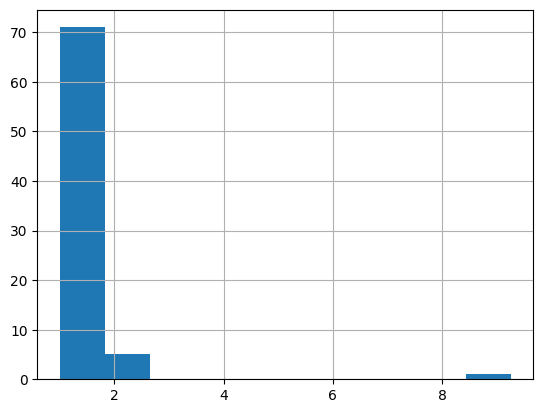

In [26]:
df_station_cluster['max_diff'].hist()


In [27]:
df_station_cluster[df_station_cluster['max_diff'] > 1.5]['Station'].to_list()

['SD000071X01',
 'SD000209X01',
 'SD000209X02',
 'SD000210X01',
 'SD000210X02',
 'SD000210X03',
 'SD000216X01',
 'SD000227X01',
 'SD000228X01',
 'SD000229X01',
 'SD000230X01',
 'SD000232X01',
 'SD000232X07',
 'SD000237X01']

In [28]:
import plotly.express as px



df_vs_sample_clustered = df_vs_stations.iloc[df_vs_stations_sample.index]
df_vs_sample_clustered['Cluster'] = df_vs_stations_sample['Cluster']

desired_station_list = df_station_cluster[df_station_cluster['max_diff'] > 1.5]['Station'].to_list()
desired_station_list.append('Cluster')

    #df_vs_sample_clustered.head()
    # Plotando o dendrograma
fig = px.parallel_coordinates(
        df_vs_sample_clustered[desired_station_list], 
        color="Cluster", 
        labels="Station"
            #,color_continuous_scale=px.colors.diverging.Tealrose
            #,color_continuous_midpoint=2
        )
fig.show()

C:\Users\bzlj0r\AppData\Local\Temp\ipykernel_25572\726825314.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
#vs_columns_stations
def get_year_month_id(d):
    year_month_id = f"{d.year}-{d.month}"
    return year_month_id

df_vs_filled['year_month'] = df_vs_filled['day'].apply(get_year_month_id)

df_year_month_station_tag = df_vs_filled.copy()

C:\Users\bzlj0r\AppData\Local\Temp\ipykernel_25572\3604511129.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [30]:
vs_columns_to_cluster = ['year_month']

vs_columns_to_cluster.extend(vs_columns_stations)

df_station_tag = df_year_month_station_tag[vs_columns_to_cluster].copy()

df_station_tag.to_csv('./data/df_station_tag.csv', index=False)

In [32]:
df_station_tag[df_station_tag['year_month'] == '2024-1']\
                                                    .drop(columns=['year_month'])\
                                                    .copy()

,GA311510X01,GA770716X01,SD000071X01,SD000071X02,SD000072X01,SD000073X01,SD000074X01,SD000077X01,SD000077X02,SD000078X01,...,SD000228X01,SD000229X01,SD000230X01,SD000231X01,SD000232X01,SD000232X07,SD000236X01,SD000237X01,laser_mark108,laser_mark208
1394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1395,2,1,0,1,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1396,2,1,0,1,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1397,2,1,0,1,0,0,0,2,3,2,...,0,0,0,0,0,0,0,0,0,1
1398,2,1,0,1,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077057,2,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1077058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1077059,2,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1077060,4,0,1,0,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_station_tag.head()

,year_month,GA311510X01,GA770716X01,SD000071X01,SD000071X02,SD000072X01,SD000073X01,SD000074X01,SD000077X01,SD000077X02,...,SD000228X01,SD000229X01,SD000230X01,SD000231X01,SD000232X01,SD000232X07,SD000236X01,SD000237X01,laser_mark108,laser_mark208
0,2024-3,2,0,1,0,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
1,2024-3,2,0,1,0,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
2,2024-3,2,0,1,0,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
3,2024-4,2,6,0,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1
4,2024-4,2,2,0,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1


array([[<Axes: title={'center': 'num_of_am_binded'}>,
        <Axes: title={'center': 'number_of_cycles_in_am'}>],
       [<Axes: title={'center': 'number_of_cycles_in_final'}>, <Axes: >]],
      dtype=object)

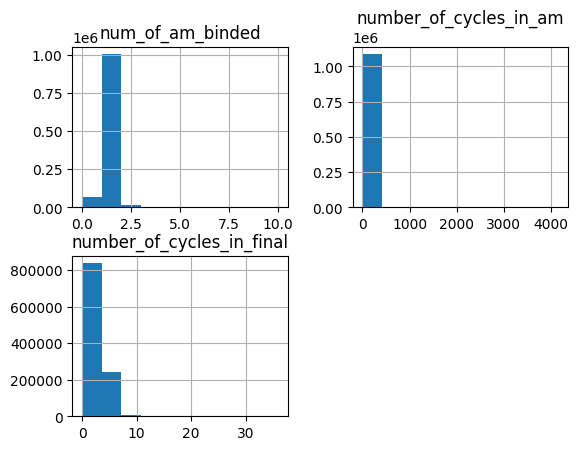

In [47]:

vs_columns_tag = ['day','year_month']

#vs_columns_lead
#vs_columns_serials
#vs_columns_stations
#vs_columns_stats
#vs_columns_status


df_year_month_station_tag[vs_columns_stats].hist()

array([[<Axes: title={'center': 'lead_time_gear'}>,
        <Axes: title={'center': 'lead_time_am'}>],
       [<Axes: title={'center': 'lead_gear_am_ts'}>,
        <Axes: title={'center': 'lead_time_final'}>]], dtype=object)

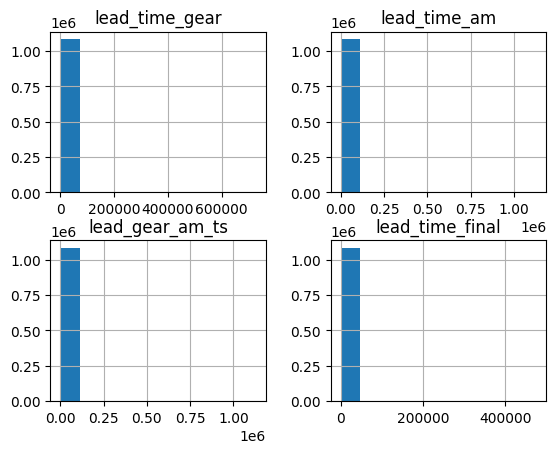

In [37]:
df_year_month_station_tag[vs_columns_lead].hist()

In [52]:

vs_columns_tag_lead = ['day']
vs_columns_tag_lead.extend(vs_columns_lead)

df_lead = df_vs_filled[vs_columns_tag_lead].copy()


df_lead.head()

,day,lead_time_gear,lead_time_am,lead_gear_am_ts,lead_time_final
0,2024-03-01,935,100,1017,2
1,2024-03-01,1026,133,1061,3
2,2024-03-01,940,281,1203,2
3,2024-04-03,577,962,1539,0
4,2024-04-03,216,41,257,1


In [60]:
def has_not_been_completed_in_prod_line(x):
    if x['lead_time_gear'] < 1:
        return 1
    elif x['lead_time_am'] < 1:
        return 1
    elif x['lead_gear_am_ts'] < 1:
        return 1
    elif x['lead_time_final'] < 0:
        return 1
    else:
        return 0


df_lead['has_not_been_completed'] = df_lead.apply(has_not_been_completed_in_prod_line, axis=1)

In [74]:
df_lead_gp = df_lead.groupby(by=['day'], as_index=False)
df_lead_by_day = df_lead_gp.agg({
    'has_not_been_completed': 'sum'
})

for c in vs_columns_lead:

    print(c)

    df_gp = df_lead[df_lead[c] >-1].groupby(by=['day'], as_index=False)

    df_c = df_gp.agg({c: 'mean'})

    df_lead_by_day = df_lead_by_day.merge(df_c, on=['day'])

df_lead_by_day.to_csv('./data/df_lead_by_day.csv', index=False)

lead_time_gear
lead_time_am
lead_gear_am_ts
lead_time_final


In [83]:
df_dc = pd.read_csv("./data/gear_debit_credit.csv", header=0, delimiter=",")

df_dc['day'] = pd.to_datetime(df_dc['day'])
df_dc.head()

df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   day                         780 non-null    datetime64[ns]
 1   credit_qty                  780 non-null    int64         
 2   debit_qty                   780 non-null    int64         
 3   credit_num_of_transactions  780 non-null    int64         
 4   debit_num_of_transactions   780 non-null    int64         
 5   diff_qty                    780 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 36.7 KB


In [88]:
#df_lead_by_day.merge(df_dc, on=['day'])
df_lead_by_day['day'] = pd.to_datetime(df_lead_by_day['day'])

df_lead_dc =df_lead_by_day.merge(df_dc, on=['day'])

df_lead_dc.to_csv('./data/df_lead_dc.csv', index=False)

df_lead_dc.head()



,day,has_not_been_completed,lead_time_gear,lead_time_am,lead_gear_am_ts,lead_time_final,credit_qty,debit_qty,credit_num_of_transactions,debit_num_of_transactions,diff_qty
0,2023-01-04,238,3935.420290,8838.973574,10856.100139,9026.619962,760,0,19,0,760
1,2023-01-06,203,687.377922,1357.049933,2047.604588,0.723104,560,780,14,26,-220
2,2023-01-07,232,252.931782,555.182116,810.604594,0.717949,1480,1200,37,34,280
3,2023-01-08,432,330.433468,376.249135,710.141176,0.655303,1280,990,32,30,290
4,2023-01-09,255,2952.326167,3249.482353,3572.360554,1872.592862,4560,1178,27,48,3382


In [94]:
from sklearn.preprocessing import MinMaxScaler

# Dividindo em treino e teste (80-20)
from sklearn.model_selection import train_test_split

df_to_predict = df_lead_dc.copy()

df_to_predict.drop(columns=['day','diff_qty','credit_qty','debit_num_of_transactions','credit_num_of_transactions'], inplace=True)

X = df_to_predict.drop(columns=['debit_qty'])
y = df_to_predict['debit_qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Criando e treinando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = rf_model.predict(X_test_scaled)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas do Modelo Random Forest:")
print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Importância das características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nImportância das Características:")
print(feature_importance)


Métricas do Modelo Random Forest:
Erro Quadrático Médio: 328762.13
R² Score: -0.01

Importância das Características:
                  feature  importance
0  has_not_been_completed    0.338760
1          lead_time_gear    0.245485
3         lead_gear_am_ts    0.158275
2            lead_time_am    0.131860
4         lead_time_final    0.125620
